In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# ATTENTION
# Utiliser un kernel sur lequel tensorflow est installé

# SUMMARY

## [Import libraries and files](#ch0)

# [1 - Remove tags](#ch1)

# [2 - Tokenize ](#ch2)

# [3 - Lemmatize ](#ch3)

# [4 - Whole function ](#ch4)

# [5 - Tags ](#ch5)

# [6 - Features Extract ](#ch6)

# [7 - RNN Models ](#ch7)

# [8 - LDA ](#ch8)



## [Export](#ch99)

<a id="ch0"></a>
## Import libraries and files

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Tokenize
import nltk
from collections import Counter
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import re
import spacy

# Features Extract
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import cluster, metrics
from sklearn import manifold, decomposition
from wordcloud import WordCloud

# RNN models

import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import tensorflow_hub as hub

import os
import transformers
from transformers import AutoTokenizer
from transformers import TFAutoModel

import gensim

#LDA

import gensim.corpora as corpora
import pyLDAvis
import pyLDAvis.gensim_models
from gensim.models import CoherenceModel

# Test models
from sklearn.linear_model import SGDClassifier, LogisticRegression

In [ ]:
query_results = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/query_results.csv")

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#from google.colab import drive 
#drive.mount('/content/gdrive')

#query_results = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/query_results.csv")

<a id="ch1"></a>
## I - Remove tags

In [ ]:
query_results.head(3)

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,C# Generics won't allow Delegate Type Constraints,<p>Is it possible to define a class in C# such...,<c#><generics><events><delegates><constraints>,191940,81,29837,12,8
1,How do you get a directory listing in C?,<p>How do you scan a directory for folders and...,<c><file><directory><cross-platform><common-ta...,12489,69,139075,22,9
2,Returning DataTables in WCF/.NET,<p>I have a WCF service from which I want to r...,<c#><.net><wcf><web-services><datatable>,12702,51,56460,12,8


In [ ]:
# Show before suppr
print(query_results.Body[0])

<p>Is it possible to define a class in C# such that</p>

<pre><code>class GenericCollection&lt;T&gt; : SomeBaseCollection&lt;T&gt; where T : Delegate
</code></pre>

<p>I couldn't for the life of me accomplish this last night in .NET 3.5. I tried using</p>

<p><code>delegate, Delegate, Action&lt;T&gt; and Func&lt;T, T&gt;</code></p>

<p>It seems to me that this should be allowable in some way. I'm trying to implement my own EventQueue.</p>

<p>I ended up just doing this [primitive approximation mind you].</p>

<pre><code>internal delegate void DWork();

class EventQueue {
    private Queue&lt;DWork&gt; eventq;
}
</code></pre>

<p>But then I lose the ability to reuse the same definition for different types of functions.</p>

<p>Thoughts?</p>



In [ ]:
def suppr_balises_html(text):
 
    soup = BeautifulSoup(text, "html.parser")
#    for data in soup(['style', 'script']):
 #         data.decompose()
            
    text_out = ' '.join(soup.stripped_strings)
    # Remove \n
    text_out = text_out.replace("\n", " ")        
    return text_out

In [ ]:
# Apply function
test = suppr_balises_html(query_results.Body[0])

In [ ]:
# Show after suppr
test

"Is it possible to define a class in C# such that class GenericCollection<T> : SomeBaseCollection<T> where T : Delegate I couldn't for the life of me accomplish this last night in .NET 3.5. I tried using delegate, Delegate, Action<T> and Func<T, T> It seems to me that this should be allowable in some way. I'm trying to implement my own EventQueue. I ended up just doing this [primitive approximation mind you]. internal delegate void DWork();  class EventQueue {     private Queue<DWork> eventq; } But then I lose the ability to reuse the same definition for different types of functions. Thoughts?"

In [ ]:
soup = BeautifulSoup(test)
soup

<html><body><p>Is it possible to define a class in C# such that class GenericCollection<t> : SomeBaseCollection<t> where T : Delegate I couldn't for the life of me accomplish this last night in .NET 3.5. I tried using delegate, Delegate, Action<t> and Func<t t=""> It seems to me that this should be allowable in some way. I'm trying to implement my own EventQueue. I ended up just doing this [primitive approximation mind you]. internal delegate void DWork();  class EventQueue {     private Queue<dwork> eventq; } But then I lose the ability to reuse the same definition for different types of functions. Thoughts?</dwork></t></t></t></t></p></body></html>

In [ ]:
# SUPPR QUAND SOUTENANCE
'''# Remove \n
soup.get_text().replace("\n", " ")'''

'# Remove \n\nsoup.get_text().replace("\n", " ")'

<a id="ch2"></a>
## II - Tokenize

In [ ]:
# Words lowered to be all the same - and avoid case issues
test = str(soup).lower()
test

'<html><body><p>is it possible to define a class in c# such that class genericcollection<t> : somebasecollection<t> where t : delegate i couldn\'t for the life of me accomplish this last night in .net 3.5. i tried using delegate, delegate, action<t> and func<t t=""> it seems to me that this should be allowable in some way. i\'m trying to implement my own eventqueue. i ended up just doing this [primitive approximation mind you]. internal delegate void dwork();  class eventqueue {     private queue<dwork> eventq; } but then i lose the ability to reuse the same definition for different types of functions. thoughts?</dwork></t></t></t></t></p></body></html>'

In [ ]:
# Tokenize without ponctuation
tokenizer = nltk.RegexpTokenizer(r'\w+')
tokenized = tokenizer.tokenize(test)

In [ ]:
# First cleaning of stopwords
# Suppr most frequent words and small words (<2)
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('english')
test_without_sw = [word for word in tokenized if word not in stopwords and len(word) > 2]
test_without_sw

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['html',
 'body',
 'possible',
 'define',
 'class',
 'class',
 'genericcollection',
 'somebasecollection',
 'delegate',
 'life',
 'accomplish',
 'last',
 'night',
 'net',
 'tried',
 'using',
 'delegate',
 'delegate',
 'action',
 'func',
 'seems',
 'allowable',
 'way',
 'trying',
 'implement',
 'eventqueue',
 'ended',
 'primitive',
 'approximation',
 'mind',
 'internal',
 'delegate',
 'void',
 'dwork',
 'class',
 'eventqueue',
 'private',
 'queue',
 'dwork',
 'eventq',
 'lose',
 'ability',
 'reuse',
 'definition',
 'different',
 'types',
 'functions',
 'thoughts',
 'dwork',
 'body',
 'html']

In [ ]:
# SUPPR QUAND SOUTENANCE

'''# Second cleaning of stopwords
words_whole_df = []
for i in query_results.Body:
    words_whole_df.append(i)

tokenized_words_whole_df = tokenizer.tokenize(str(words_whole_df))

# Print and check most common tokens
most_common_tokens = Counter(tokenized_words_whole_df).most_common(100)

test_without_stopwords = [word for word in test_without_sw if not word in most_common_tokens]
test_without_stopwords'''

'# Second cleaning of stopwords\nwords_whole_df = []\nfor i in query_results.Body:\n    words_whole_df.append(i)\n\ntokenized_words_whole_df = tokenizer.tokenize(str(words_whole_df))\n\n# Print and check most common tokens\nmost_common_tokens = Counter(tokenized_words_whole_df).most_common(100)\n\ntest_without_stopwords = [word for word in test_without_sw if not word in most_common_tokens]\ntest_without_stopwords'

Those tokens are not specific : it is okay to get rid of them.  
CHECK l'impact de ce cleaning au moment du tf-idf : ce que ça change aux résultats.

<a id="ch3"></a>
## III - Lemmatize

In [ ]:
# First need to POS-tag tokens
nltk.download('averaged_perceptron_tagger')
test_postagged = dict(nltk.pos_tag(test_without_sw))
test_postagged 

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


{'html': 'NN',
 'body': 'NN',
 'possible': 'JJ',
 'define': 'JJ',
 'class': 'NN',
 'genericcollection': 'NN',
 'somebasecollection': 'NN',
 'delegate': 'NN',
 'life': 'NN',
 'accomplish': 'JJ',
 'last': 'JJ',
 'night': 'NN',
 'net': 'NN',
 'tried': 'VBD',
 'using': 'VBG',
 'action': 'NN',
 'func': 'NN',
 'seems': 'VBZ',
 'allowable': 'JJ',
 'way': 'NN',
 'trying': 'VBG',
 'implement': 'JJ',
 'eventqueue': 'NN',
 'ended': 'VBD',
 'primitive': 'JJ',
 'approximation': 'NN',
 'mind': 'IN',
 'internal': 'JJ',
 'void': 'NN',
 'dwork': 'NN',
 'private': 'JJ',
 'queue': 'NN',
 'eventq': 'VBP',
 'lose': 'JJ',
 'ability': 'NN',
 'reuse': 'VBP',
 'definition': 'NN',
 'different': 'JJ',
 'types': 'NNS',
 'functions': 'NNS',
 'thoughts': 'NNS'}

In [ ]:
# Function to convert pos_tag tags to WordNetLemmatizer tags
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [ ]:
# Replace values of the dictionary
def replace_pos(tokens):
    k = 0
    for i in tokens.keys():
        tokens[i] = get_wordnet_pos(tokens[i])
        k += 1
    return tokens

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')
postagged = replace_pos(test_postagged)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
def lemmatize(tokens):
    WNlemmatizer = WordNetLemmatizer()
    lem_tokens = []
    for key in tokens.keys():
        if tokens[key] is None :    # In case there are no tags
            lem_tokens.append(key)
        else :
            lem_tokens.append(WNlemmatizer.lemmatize(key, pos=tokens[key]) )
    return lem_tokens

lemmatize(postagged)

['html',
 'body',
 'possible',
 'define',
 'class',
 'genericcollection',
 'somebasecollection',
 'delegate',
 'life',
 'accomplish',
 'last',
 'night',
 'net',
 'try',
 'use',
 'action',
 'func',
 'seem',
 'allowable',
 'way',
 'try',
 'implement',
 'eventqueue',
 'end',
 'primitive',
 'approximation',
 'mind',
 'internal',
 'void',
 'dwork',
 'private',
 'queue',
 'eventq',
 'lose',
 'ability',
 'reuse',
 'definition',
 'different',
 'type',
 'function',
 'thought']

<a id="ch4"></a>
## IV - Whole function

In [ ]:
# Functions

def listToString(s):
 
    # initialize an empty string
    str1 = ""
 
    # traverse in the string
    for ele in s:
        str1 += ele + ' '
 
    # return string
    return str1

# A améliorer avec Daouda
def keep_nouns(sentence):
    #nlp = spacy.load("en_core_web_sm")  Mettait plus d'une heure à s'exécuter
    #sentence_nlp = nlp(sentence)
    liste = []
    for word in sentence:
        if word.pos_ == "NOUN" or word.pos_ == "PROPN":
            liste.append(word)
    return liste

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
def tokenization_full(text):
    text_out = suppr_balises_html(text)
    text_out = text_out.lower()
    # Tokenize
    tokenizer = nltk.RegexpTokenizer(r'\w+')
    tokenized = tokenizer.tokenize(text_out)
    # Stopwords
    stopwords = nltk.corpus.stopwords.words('english')
    text_without_sw = [word for word in tokenized if word not in stopwords and len(word) > 2]
    # First need to POS-tag tokens
    postagged = dict(nltk.pos_tag(text_without_sw))
    tokens = replace_pos(postagged)
    lem_tokens = lemmatize(tokens)
    # NER
    tokens_from_list_to_strings = listToString(lem_tokens)
    sentences_nlp_ = nlp(tokens_from_list_to_strings)
    ner_tokens = keep_nouns(sentences_nlp_)
    detokenized = [token.text_with_ws for token in ner_tokens]
    detokenized = str(detokenized)
    return detokenized


In [ ]:
#query_results["body_cleaned"] = query_results.Body.apply(tokenization_full)

<a id="ch5"></a>
## V - Tags

In [ ]:
query_results.head()

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,C# Generics won't allow Delegate Type Constraints,<p>Is it possible to define a class in C# such...,<c#><generics><events><delegates><constraints>,191940,81,29837,12,8
1,How do you get a directory listing in C?,<p>How do you scan a directory for folders and...,<c><file><directory><cross-platform><common-ta...,12489,69,139075,22,9
2,Returning DataTables in WCF/.NET,<p>I have a WCF service from which I want to r...,<c#><.net><wcf><web-services><datatable>,12702,51,56460,12,8
3,How to create a DataFrame from a text file in ...,<p>I have a text file on HDFS and I want to co...,<scala><apache-spark><dataframe><apache-spark-...,36766322,21,168246,12,8
4,mysqli or PDO - what are the pros and cons?,<p>In our place we're split between using mysq...,<php><mysql><pdo><mysqli><database-abstraction>,13569,342,145444,285,13


In [ ]:
def clean_tags(tags):
    # Separate tags
    pattern_brackets = r"\<.*?\>"
    tags_separated = re.findall(pattern_brackets, tags)
    # Remove brackets
    pattern_remove_brackets = r'[<>]'
    tags_cleaned = [re.sub(pattern_remove_brackets, '', word) for word in tags_separated]
    return tags_cleaned

In [ ]:
query_results["tags_cleaned"] = query_results.Tags.apply(clean_tags)

In [ ]:
list_tags = []
for i in query_results.tags_cleaned:
    list_tags.extend(i)

In [ ]:
tags_sorted = Counter(list_tags).most_common(100)
tags_sorted = dict(tags_sorted)

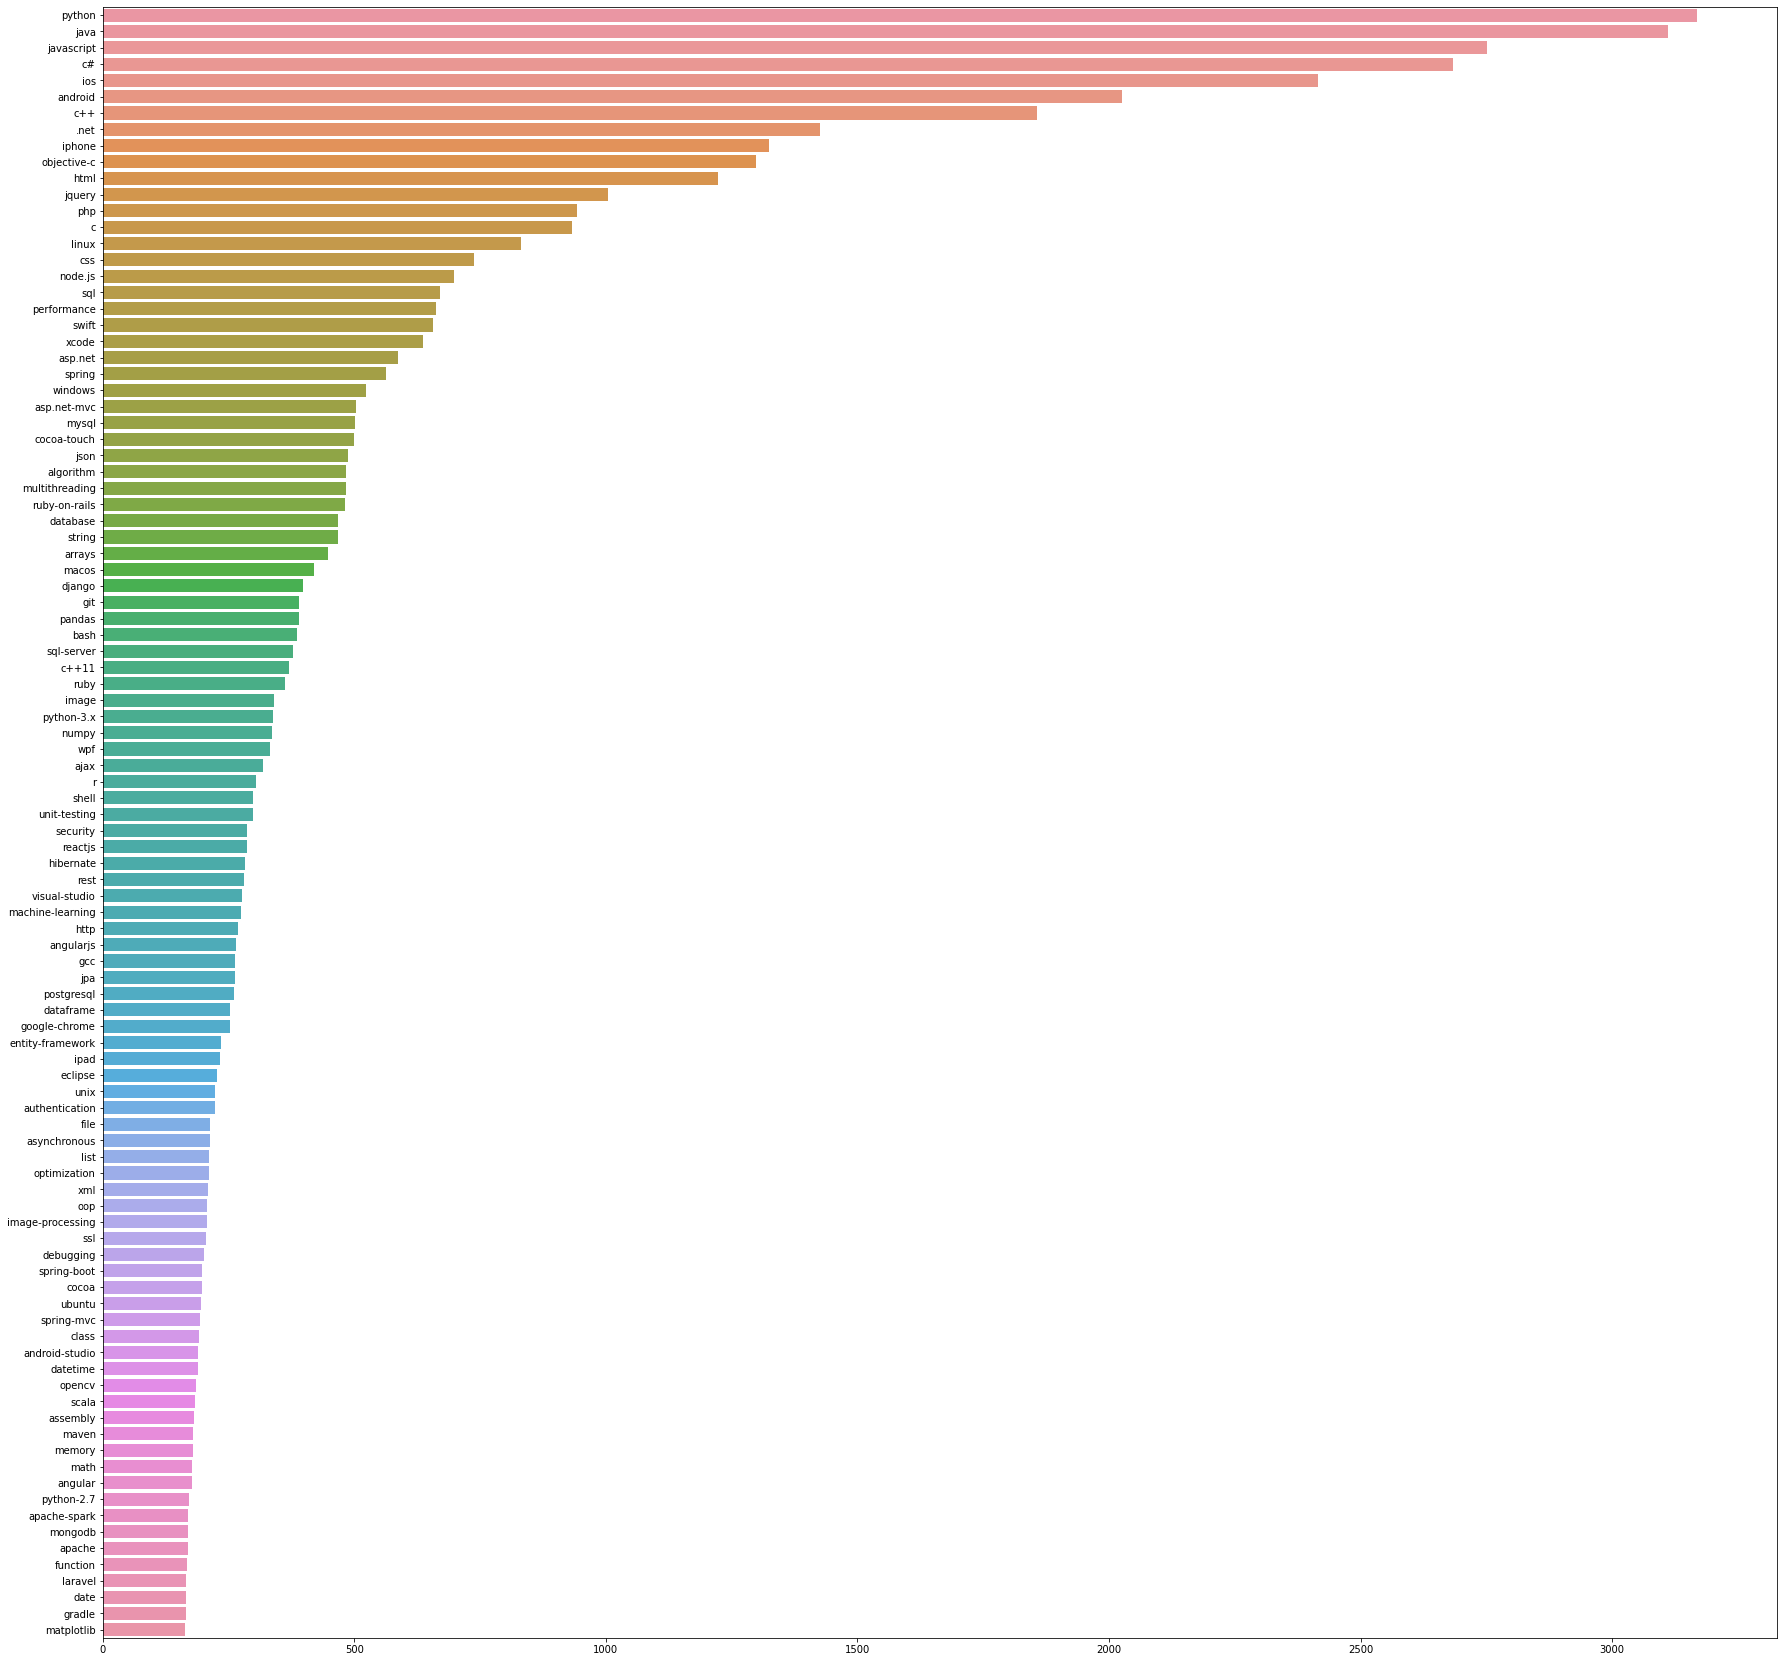

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(30,30))

#plt.bar(tags_sorted.keys(), tags_sorted.values())
sns.barplot(y=list(tags_sorted.keys()), x=list(tags_sorted.values()), orient="h")

In [ ]:
# Keep only these tags in the df
def remove_rare_tags(list_of_tags):
    new_list = []
    for tag in list_of_tags:
        if tag in list(tags_sorted.keys()):
            new_list.append(tag)
    return new_list

In [ ]:
query_results["tags_cleaned_selected"] = query_results.tags_cleaned.apply(remove_rare_tags)
query_results.head(15)

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount,tags_cleaned,tags_cleaned_selected
0,C# Generics won't allow Delegate Type Constraints,<p>Is it possible to define a class in C# such...,<c#><generics><events><delegates><constraints>,191940,81,29837,12,8,"[c#, generics, events, delegates, constraints]",[c#]
1,How do you get a directory listing in C?,<p>How do you scan a directory for folders and...,<c><file><directory><cross-platform><common-ta...,12489,69,139075,22,9,"[c, file, directory, cross-platform, common-ta...","[c, file]"
2,Returning DataTables in WCF/.NET,<p>I have a WCF service from which I want to r...,<c#><.net><wcf><web-services><datatable>,12702,51,56460,12,8,"[c#, .net, wcf, web-services, datatable]","[c#, .net]"
3,How to create a DataFrame from a text file in ...,<p>I have a text file on HDFS and I want to co...,<scala><apache-spark><dataframe><apache-spark-...,36766322,21,168246,12,8,"[scala, apache-spark, dataframe, apache-spark-...","[scala, apache-spark, dataframe]"
4,mysqli or PDO - what are the pros and cons?,<p>In our place we're split between using mysq...,<php><mysql><pdo><mysqli><database-abstraction>,13569,342,145444,285,13,"[php, mysql, pdo, mysqli, database-abstraction]","[php, mysql]"
5,How to load plugins in .NET?,<p>I'd like to provide some way of creating dy...,<.net><windows><plugins><add-in><extensibility>,14278,27,14769,15,8,"[.net, windows, plugins, add-in, extensibility]","[.net, windows]"
6,Increasing camera capture resolution in OpenCV,"<p>In my C/C++ program, I'm using <a href=""htt...",<c><image><opencv><webcam><resolutions>,14287,52,78108,26,15,"[c, image, opencv, webcam, resolutions]","[c, image, opencv]"
7,Change templates in Xcode,<p>How would I change the initial templates cr...,<xcode><macos><templates><xcode4><xcode4.5>,33720,113,50902,65,10,"[xcode, macos, templates, xcode4, xcode4.5]","[xcode, macos]"
8,WordPress MediaWiki integration,"<p>On the other end of the spectrum, I would b...",<php><mysql><wordpress><lamp><mediawiki>,33745,10,18616,11,6,"[php, mysql, wordpress, lamp, mediawiki]","[php, mysql]"
9,What is tail recursion?,"<p>Whilst starting to learn lisp, I've come ac...",<algorithm><language-agnostic><functional-prog...,33923,1956,559426,907,31,"[algorithm, language-agnostic, functional-prog...",[algorithm]


In [ ]:
# Get rid of rows with empty tags
query_results = query_results[query_results.tags_cleaned_selected.astype(str) != '[]']
query_results.reset_index(drop=True, inplace=True)

<a id="ch7"></a>
## VII - RNN Models

#### Fonctions communes

In [ ]:
from sklearn import cluster, metrics
from sklearn import manifold, decomposition

In [ ]:

# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features) :
    time1 = time.time()
    num_labels=len(l_cat)
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
    plt.title('Représentation des tweets par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des tweets par clusters')
    
    plt.show()
    print("ARI : ", ARI)


<a id="ch7-2"></a>
### 7 - 2 - BERT

In [ ]:
#To extract features using methods such as BERT, we should not remove stopwords or lemmatize as we did before, so we create a new function.

def message_to_words(raw_text):
   
    # 1. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", raw_text) 
    #
    # 2. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    return( " ".join(words)) 

In [ ]:
query_results["body_bert_use"] = query_results.Body.apply(message_to_words)

In [ ]:
# Bert

os.environ["TF_KERAS"]='1'

#### Fonctions communes

In [ ]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

In [ ]:
stop

#### 7 - 2 - 1 - BERT HuggingFace

In [ ]:
max_length = 16
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)

In [ ]:
def clean_tags(tags):
    # Separate tags
    pattern_brackets = r"\<.*?\>"
    tags_separated = re.findall(pattern_brackets, tags)
    # Remove brackets
    pattern_remove_brackets = r'[<>]'
    tags_cleaned = [re.sub(pattern_remove_brackets, '', word) for word in tags_separated]
    return tags_cleaned

In [ ]:
query_results["tags_cleaned_selected"] = query_results.Tags.apply(clean_tags)

In [ ]:
nb_lignes_select = 5000
data_l_cat = query_results[0:nb_lignes_select]
l_cat = [tuple(i) for i in data_l_cat['tags_cleaned_selected']]
y_cat_num = [(1-l_cat.index(tuple(data_l_cat.iloc[i]['tags_cleaned_selected']))) for i in range(len(data_l_cat))]

#l_cat = list(set(data_T['airline_sentiment']))
#print("catégories : ", l_cat)
#y_cat_num = [(1-l_cat.index(data_T.iloc[i]['airline_sentiment'])) for i in range(len(data_T))]

In [ ]:
sentences = query_results['body_bert_use'].astype(str).to_list()

# Select first 1000 rows because BERT is slow
selected_sentences = sentences[0:nb_lignes_select]
l_cat = list(set(l_cat))

In [ ]:
#Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, selected_sentences, 
                                                         max_length, batch_size, mode='HF')

ARI, X_tsne, labels = ARI_fct(features_bert)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

1/1 [==============================] - 1s 640ms/step
temps traitement :  609.0
ARI :  0.025 time :  707.0


In [ ]:
# Matrice d'embedding
df_bert_huggingface = pd.DataFrame(features_bert)
df_bert_huggingface["tags"] = query_results["tags_cleaned_selected"][0:nb_lignes_select]

In [ ]:
# Exporter le BERT
df_bert_huggingface.to_pickle("df_bert_huggingface.pkl")

In [ ]:
df_bert_huggingface.to_csv("df_bert_huggingface.csv")

#### 7 - 2 - 2 - BERT hub Tensorflow

In [ ]:
# import tensorflow_text 

# Guide sur le Tensorflow hub : https://www.tensorflow.org/text/tutorials/classify_text_with_bert
model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_layer = hub.KerasLayer(model_url, trainable=True)

max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = bert_layer

In [ ]:
features_bert_tf, last_hidden_states_tot_tf = feature_BERT_fct(model, model_type, selected_sentences, 
                                                         max_length, batch_size, mode='TFhub')

temps traitement :  1272.0


In [ ]:
df_bert_hub_tensorflow = pd.DataFrame(features_bert_tf)
df_bert_hub_tensorflow["tags"] = query_results["tags_cleaned_selected"][0:nb_lignes_select]

In [ ]:
df_bert_hub_tensorflow.to_pickle("df_bert_hub_tensorflow.pkl")

In [ ]:
df_bert_hub_tensorflow.to_csv("df_bert_hub_tensorflow.csv")

<a id="ch7-3"></a>
### 7 - 3 - USE - Universal Sentence Encoder

In [ ]:
import tensorflow_hub

In [ ]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [ ]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size+1) :
        idx = step*batch_size # Divise par batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat)) # Concatène les batchs divisés

    time2 = np.round(time.time() - time1,0)
    return features

In [ ]:
batch_size = 10
sentences = query_results['body_bert_use'].to_list()

In [ ]:
features_USE = feature_USE_fct(sentences, batch_size)

In [ ]:
# Matrice d'embedding
df_use = pd.DataFrame(features_USE)

In [ ]:
df_use["tags"] = query_results["tags_cleaned_selected"]

In [ ]:
df_use

In [ ]:
# Exporter le USE
df_use.to_pickle("use_data2.pkl")

In [ ]:
df_use.to_csv("df_use.csv")

In [ ]:
### 4 lignes manquent, ce sont les 4 du dernier batch, qui ne sont pas utilisés
len(sentences)/10

<a id="ch99"></a>
### Export

In [ ]:
to_export = query_results.copy()
to_export.drop(["Body", "Tags", 'tags_cleaned'], axis=1, inplace=True)
to_export.rename(columns={"body_cleaned":"body", "tags_cleaned_selected":"tags"}, inplace=True)

In [ ]:
to_export.to_csv("query_cleaned.csv", index=False)